In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('..')

import prepare


Acquire

In [24]:
df = pd.read_json('data2.json')

Prepare

In [25]:
df = prepare.prepare_data(df)
df, _, _ = prepare.split_data(df)

In [26]:
df.head(3)

,repo,language,readme_contents,clean_text,stem,lemmatize,target
243,facebookresearch/Detectron,Python,**Detectron is deprecated. Please see [detectr...,detectron deprecated please see groundup rewri...,detectron deprec pleas see groundup rewrit det...,detectron deprecated please see groundup rewri...,1
10,github/docs,JavaScript,# GitHub Docs <!-- omit in toc -->\n\nThis rep...,github docs omit toc repository contains websi...,github doc omit toc repositori contain websit ...,github doc omit toc repository contains websit...,2
245,taizilongxu/interview_python,Shell,<!-- markdown-toc start - Don't edit this sect...,markdowntoc start dont edit section run mx tab...,markdowntoc start dont edit section run mx tab...,markdowntoc start dont edit section run mx tab...,0


Language Counts:
- 1: Python
- 2: Javascript
- 0: Other

In [27]:
pd.concat([df['target'].value_counts(),
           df['target'].value_counts(normalize=True)], axis=1)

,target,target
0,170,0.711297
2,38,0.158996
1,31,0.129707


**What are the most common words in READMEs?**

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/martinreyes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df[df['target']==1]

,repo,language,readme_contents,clean_text,stem,lemmatize,target
243,facebookresearch/Detectron,Python,**Detectron is deprecated. Please see [detectr...,detectron deprecated please see groundup rewri...,detectron deprec pleas see groundup rewrit det...,detectron deprecated please see groundup rewri...,1
253,tornadoweb/tornado,Python,Tornado Web Server\n==================\n\n.. i...,tornado web server image alt join chat target ...,tornado web server imag alt join chat target t...,tornado web server image alt join chat target ...,1
246,littlecodersh/ItChat,Python,# itchat\n\n[![Gitter][gitter-picture]][gitter...,itchat pypy pypy english itchatpython apitutor...,itchat pypi pypi english itchatpython apitutor...,itchat pypy pypy english itchatpython apitutor...,1
219,Yorko/mlcourse.ai,Python,"<div align=""center"">\n\n![ODS stickers](https:...",div aligncenter ods open machine learning cour...,div aligncent od open machin learn cours licen...,div aligncenter od open machine learning cours...,1
159,CorentinJ/Real-Time-Voice-Cloning,Python,# Real-Time Voice Cloning\nThis repository is ...,realtime voice cloning repository transfer lea...,realtim voic clone repositori transfer learn s...,realtime voice cloning repository transfer lea...,1
142,vnpy/vnpy,Python,"# VeighNa - By Traders, For Traders.\n\n<p ali...",veighna traders traders p aligncenter img src ...,veighna trader trader p aligncent img src p wa...,veighna trader trader p aligncenter img src p ...,1
117,openai/gym,Python,[![pre-commit](https://img.shields.io/badge/pr...,code style important notice team maintaining g...,code style import notic team maintain gym sinc...,code style important notice team maintaining g...,1
43,django/django,Python,======\nDjango\n======\n\nDjango is a high-lev...,django django highlevel python web framework e...,django django highlevel python web framework e...,django django highlevel python web framework e...,1
126,numpy/numpy,Python,"<h1 align=""center"">\n<img src=""https://raw.git...",h aligncenter img width hbr powered pypi conda...,h aligncent img width hbr power pypi conda sta...,h aligncenter img width hbr powered pypi conda...,1
21,TheAlgorithms/Python,Python,"<div align=""center"">\n<!-- Title: -->\n <a hr...",div aligncenter title img height ha algorithms...,div aligncent titl img height ha algorithmsa p...,div aligncenter title img height ha algorithms...,1


In [30]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


all_readme_contents = ' '.join(df['lemmatize'])
tokens = word_tokenize(all_readme_contents)
word_counts = Counter(tokens)

In [31]:
word_counts.most_common(20)

[('yes', 1755),
 ('source', 1535),
 ('free', 1411),
 ('data', 1171),
 ('javascript', 1165),
 ('api', 987),
 ('unknown', 919),
 ('code', 904),
 ('python', 851),
 ('file', 844),
 ('use', 820),
 ('open', 810),
 ('project', 802),
 ('img', 779),
 ('web', 750),
 ('using', 707),
 ('p', 699),
 ('value', 654),
 ('library', 654),
 ('c', 629)]

In [32]:
def find_most_common_words(df,
                           language = 'all',
                           stem_or_lem = 'lemmatize',
                           num_words = 20,
                           plot = True):
    
    df = df[df['target']==language] if type(language) == int else df
    all_readme_contents = ' '.join(df[stem_or_lem])
    tokens = word_tokenize(all_readme_contents)
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)
    
    if plot:
        colors = sns.color_palette("Blues", len(most_common_words))[::-1]
        sns.barplot(y = [word_freqs[0] for word_freqs in most_common_words],
                    x = [word_freqs[1] for word_freqs in most_common_words],
                    palette=colors)
        language_titles = {1: 'Python', 2: 'Javascript', 0: 'Other'}

        lang_title = language_titles.get(language, 'All')
        plt.title(f'{str(num_words)} Most Common Words for {lang_title}')
        
        plt.tick_params(axis='both', left=False, bottom=False)
        plt.xlabel('Word Count')
        sns.despine()
        plt.show()
    
    return most_common_words

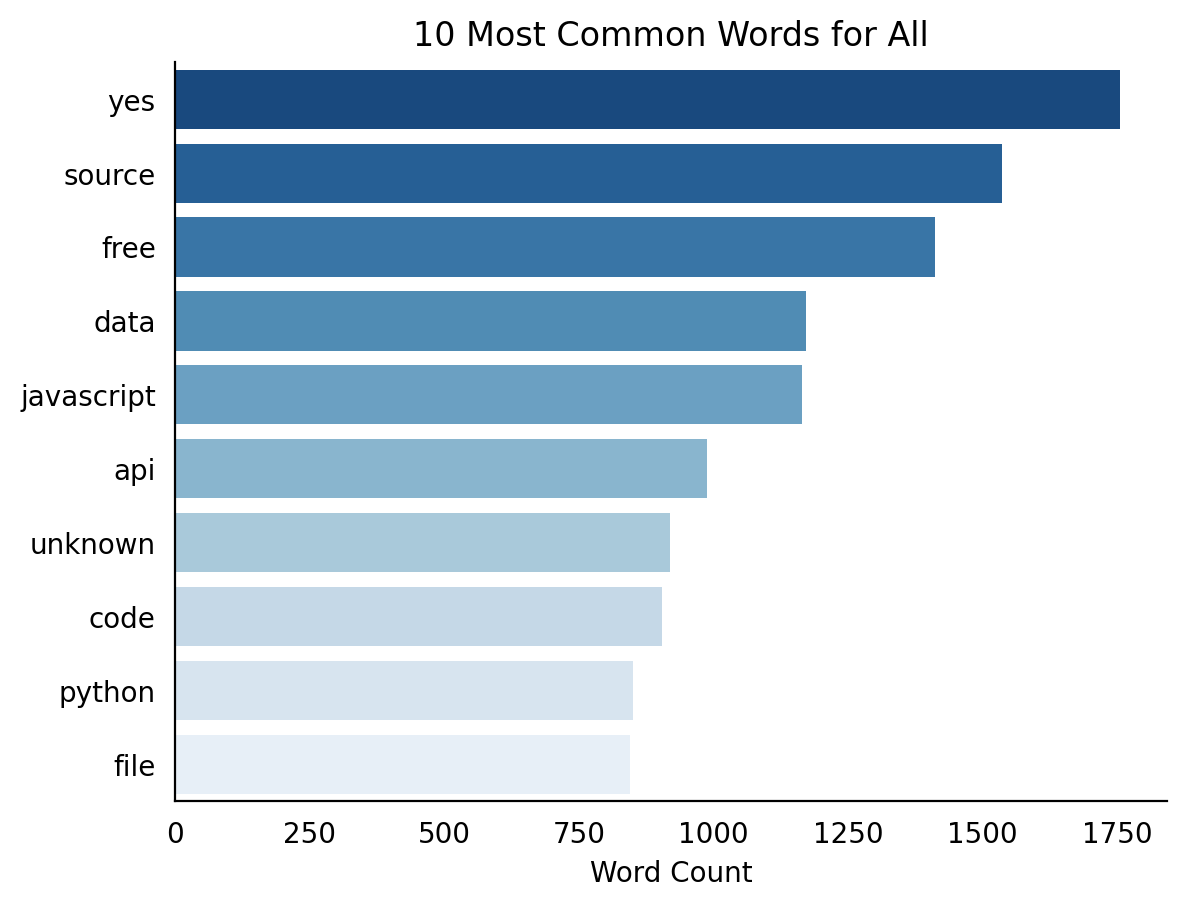

In [33]:
x = find_most_common_words(df,
                           language = 'all',
                           stem_or_lem = 'lemmatize',
                           num_words = 10)

**Does the length of the README vary by programming language?**


In [34]:
df['readme_length'] = df['readme_contents'].apply(len)
readme_lens = df.groupby('target')['readme_length'].median()
index_mapping = {0: 'other', 1: 'python', 2: 'javascript'}
readme_lens.index = readme_lens.sort_index().index.map(index_mapping)

In [35]:
readme_lens

target
other         6507.5
python        6047.0
javascript    5289.5
Name: readme_length, dtype: float64

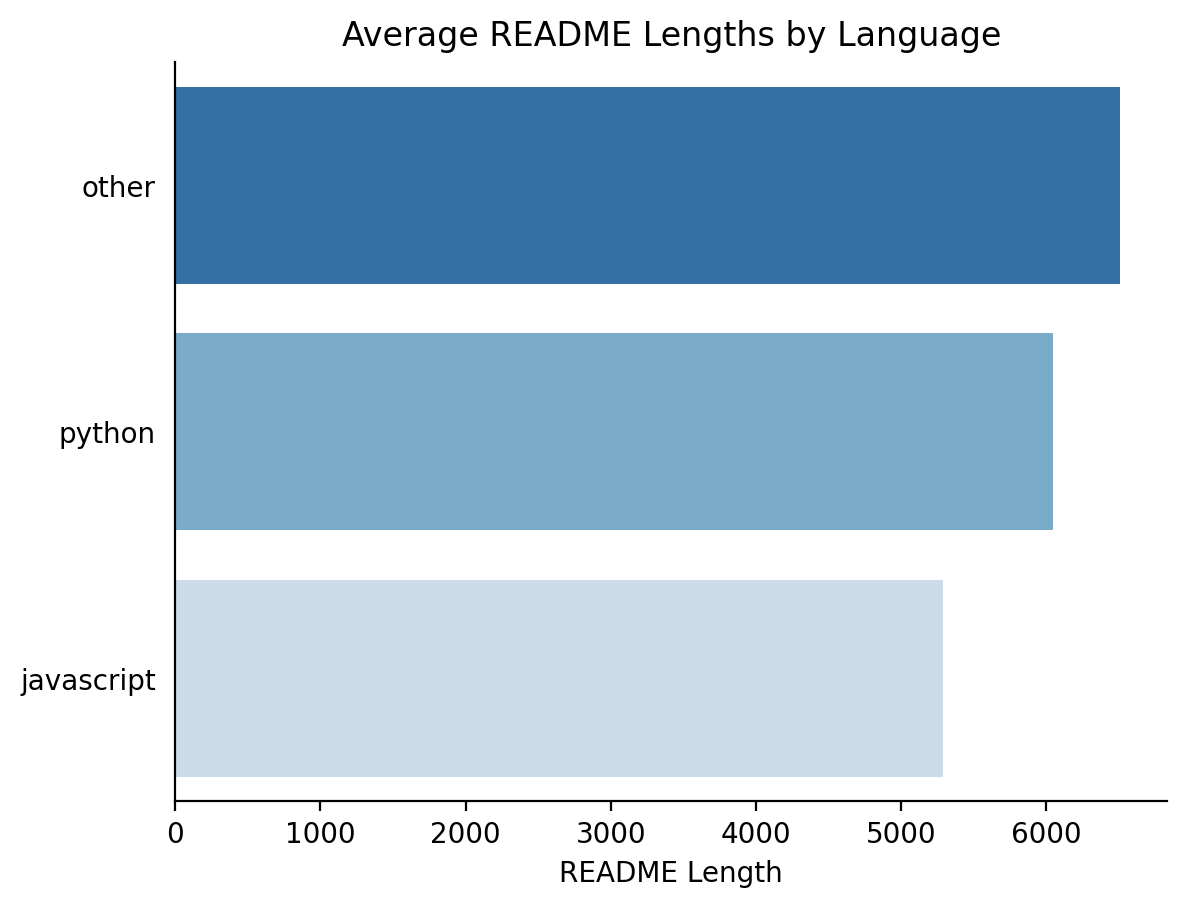

In [36]:
def plot_readme_lengths():
    
    df['readme_length'] = df['readme_contents'].apply(len)
    readme_lens = df.groupby('target')['readme_length'].median()
    index_mapping = {0: 'other', 1: 'python', 2: 'javascript'}
    readme_lens.index = readme_lens.sort_index().index.map(index_mapping)
    
    colors = sns.color_palette("Blues_r", len(readme_lens))
    sns.barplot(x = readme_lens.sort_values(ascending=False).values,
                y = readme_lens.sort_values(ascending=False).index,
                palette=colors)
    plt.title('Average README Lengths by Language')
    
    plt.tick_params(axis='both', left=False)
    plt.ylabel('')
    plt.xlabel('README Length')
    sns.despine()
    plt.show()
    
plot_readme_lengths()

**Do different programming languages use a different number of unique words?**


In [37]:
from scipy.stats import f_oneway
# Assuming you have a DataFrame 'df' with 'target' and 'readme_contents' columns
df['unique_words'] = df['readme_contents'].apply(lambda x: len(set(x.split())))

# Group the data by programming language and calculate the mean number of unique words
language_unique_words = df.groupby('target')['unique_words'].mean()

# Extract unique words data for each programming language
python_unique_words = df[df['target'] == 1]['unique_words']
javascript_unique_words = df[df['target'] == 2]['unique_words']
other_unique_words = df[df['target'] == 0]['unique_words']

# Perform ANOVA test
f_statistic, p_value = f_oneway(python_unique_words, javascript_unique_words, other_unique_words)

# Interpret the results
if p_value < 0.05:
    print("There are significant differences in the mean number of unique words among different programming languages.")
else:
    print("There are no significant differences in the mean number of unique words among different programming languages.")

There are no significant differences in the mean number of unique words among different programming languages.


In [38]:
df.groupby('target')['unique_words'].median()

target
0    291.0
1    332.0
2    282.5
Name: unique_words, dtype: float64

In [39]:
p_value

0.9247789267027375

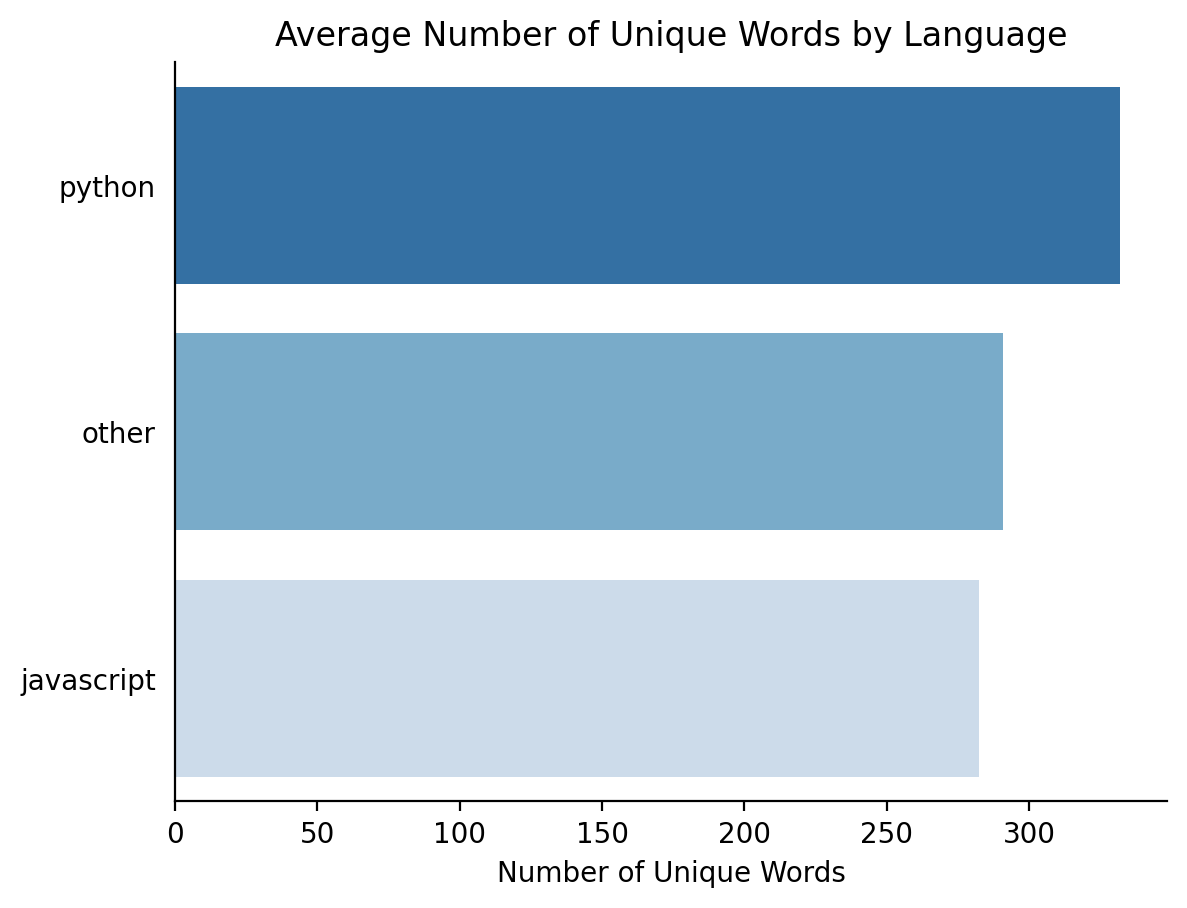

In [40]:
def plot_unique_word_averages(df):
    
    df['unique_words'] = df['readme_contents'].apply(lambda x: len(set(x.split())))
    unique_word_avgs = df.groupby('target')['unique_words'].median()
    index_mapping = {0: 'other', 1: 'python', 2: 'javascript'}
    unique_word_avgs.index = unique_word_avgs.sort_index().index.map(index_mapping)
    
    colors = sns.color_palette("Blues_r", len(unique_word_avgs))
    sns.barplot(x = unique_word_avgs.sort_values(ascending=False).values,
                y = unique_word_avgs.sort_values(ascending=False).index,
                palette=colors)
    plt.title('Average Number of Unique Words by Language')
    
    plt.tick_params(axis='both', left=False)
    plt.ylabel('')
    plt.xlabel('Number of Unique Words')
    sns.despine()
    plt.show()
    
plot_unique_word_averages(df)

**Are there any words that uniquely identify a programming language?**

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame 'df' with 'target' and 'readme_contents' columns
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatize'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                        columns=tfidf_vectorizer.get_feature_names_out())

# Add the 'target' column back to the DataFrame
tfidf_df['target'] = df['target']

# Group the data by programming language and calculate the mean TF-IDF scores for each word
language_tfidf = tfidf_df.groupby('target').mean()

In [42]:
# Specify the programming language you want to analyze (e.g., Python)
programming_language = 2

# Get words with the highest mean TF-IDF score for the specified programming language
top_words = language_tfidf.loc[programming_language].nlargest(10)
print("Top words for the programming language:")
print(top_words)

Top words for the programming language:
spring        0.068884
img           0.036787
security      0.034609
file          0.029935
widthpx       0.028684
generator     0.028440
alt           0.027392
tensorflow    0.026720
td            0.026615
project       0.026339
Name: 2.0, dtype: float64


In [50]:
def identify_unique_words(df, plot=True):
    
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatize'])
    
    # Convert TF-IDF matrix to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                            columns=tfidf_vectorizer.get_feature_names_out())
    
    # Add the 'target' column back to the DataFrame
    tfidf_df['target'] = df['target']
    
    # Group the data by programming language and calculate the mean TF-IDF scores for each word
    language_tfidf = tfidf_df.groupby('target').mean()
    
    for i, language in enumerate(['Other', 'Python', 'Javascript']):
        # Get words with the highest mean TF-IDF score for the specified programming language
        
        top_words = language_tfidf.loc[i].sort_values(ascending=False).head(5)
        print(f"{language}:")
        print(top_words, '\n')
    
        if plot:
            plt.figure(figsize=(6,3))
            colors = sns.color_palette("Blues", len(top_words))[::-1]
            sns.barplot(x = top_words.sort_values(ascending=False).values,
                        y = top_words.sort_values(ascending=False).index,
                        palette=colors)
            language_titles = {1: 'Python', 2: 'Javascript', 0: 'Other'}

            lang_title = language_titles.get(language, 'All')
            plt.title(f'Unique Words for {language}')

            plt.tick_params(axis='both', left=False, bottom=False)
            plt.xlabel('TF-IDF score')
            sns.despine()
            plt.show()
        print('-'*50)

Other:
img           0.029869
code          0.027694
project       0.022915
javascript    0.022079
learning      0.021969
Name: 0.0, dtype: float64 



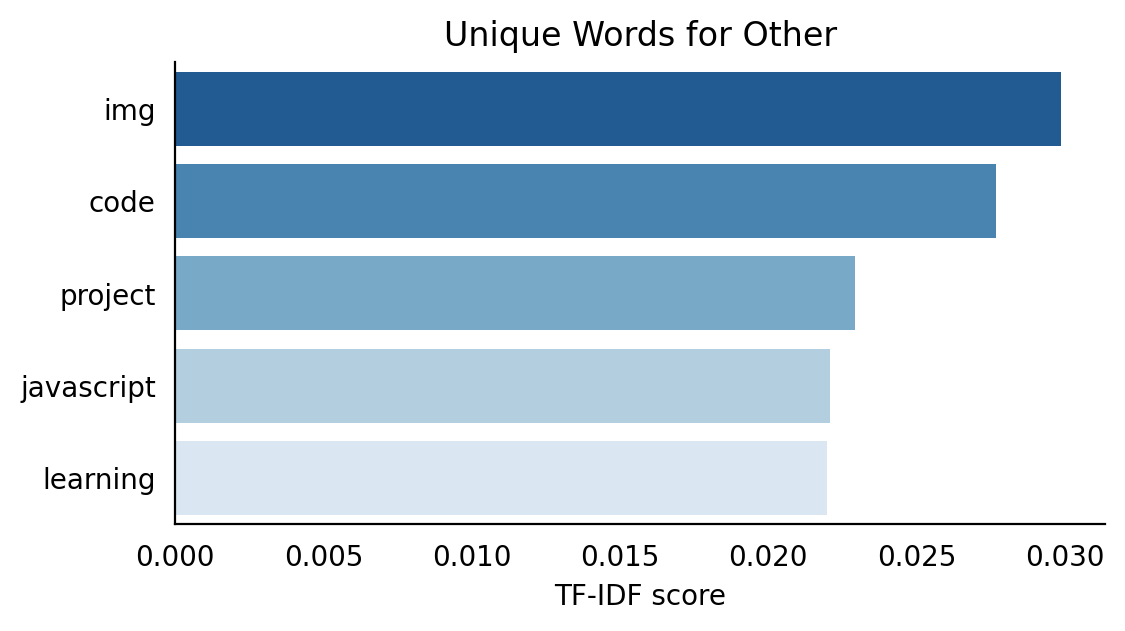

--------------------------------------------------
Python:
data       0.047977
img        0.040956
spring     0.040936
tidb       0.037057
request    0.036126
Name: 1.0, dtype: float64 



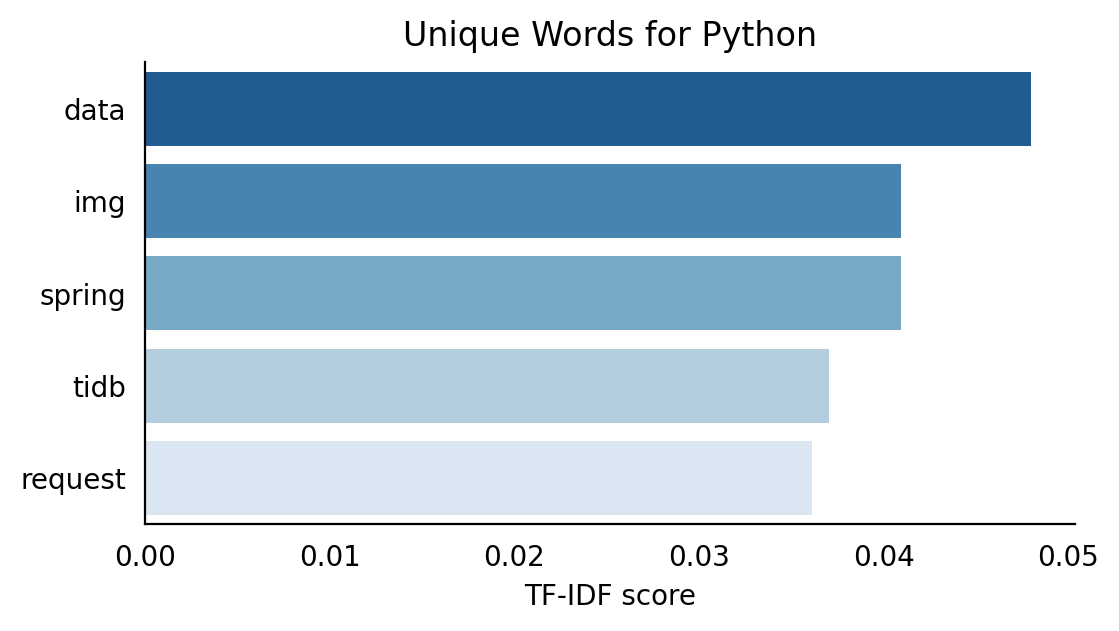

--------------------------------------------------
Javascript:
spring      0.068884
img         0.036787
security    0.034609
file        0.029935
widthpx     0.028684
Name: 2.0, dtype: float64 



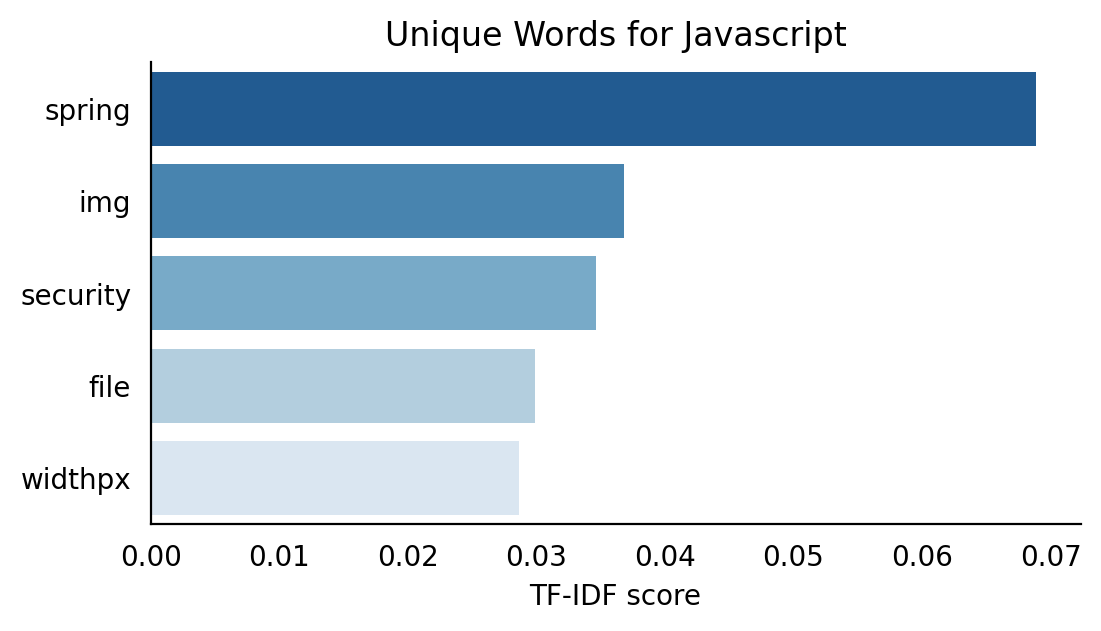

--------------------------------------------------


In [51]:
identify_unique_words(df)